# Contexto analítico

Nesse desafio, você deve resolver um case de precificação de imóveis. Esse desafio foi construído em parceria entre a Tera e o QuintoAndar, onde o objetivo é simular um projeto de machine learning com características semelhantes ao que ocorre no dia a dia da empresa.

Imagine-se na seguinte situação: a área de marketing do QuintoAndar quer montar uma calculadora de preço (como esta [aqui: https://mkt.quintoandar.com.br/quanto-cobrar-de-aluguel/), e nesse projeto, os analistas negociais e corretores querem, também, entender as principais variáveis e características chaves que influenciam no valor de venda do imóvel (Ex: quantificar o impacto do aumento da área do imóvel no preço, ou quantificar o impacto de ter piscina, ou não no preço). Você é o cientista de dados que atuará na resolução desse case.

Para tanto, existem dois objetivos principais:

Objetivo 1, interpretabilidade: construir uma regressão linear simples, com poucas variáveis importantes, visando gerar insights para corretores e proprietários no quesito precificação dos imóveis. Ou seja, o foco será na interpretação dos coeficientes (ex: se aumentar a área do imóvel em uma unidade isso irá aumentar em Y o preço deste imóvel).

Objetivo 2, predição: construir um modelo com alto poder preditivo, com mais variáveis, visando um bom desempenho e com o intuito de ser usado em uma página web como a calculadora de preço. Note que, em uma situação real, um alto erro de inferência pode gerar grande insatisfação em um proprietário de imóvel, que pode ficar ofendido com o resultado. Por isso, em casos como esse, queremos ter o menor erro possível, mesmo que o modelo  seja complexo e tenha uma interpretação mais difícil.

Roteiro para o desafio:

 Análise exploratória

Você pode tentar o seguinte:

- Verificar a distribuição da variável de interesse (valor de venda)

- Contar o número de valores faltantes

- Verificar a matriz de correlação entre as features continuas

- Scatterplots são úteis para visualizar duas variáveis continuas

- Plotar a distribuição do valor de venda (histogramas ou boxplots) para as diferentes variáveis - categóricas

- Ao final, escreva um pouco sobre o que você conseguiu entender, extrapolar e interpretar a partir da análise exploratória

O número de variáveis é alto, então é importante ser criterioso na montagem dos gráficos exploratórios. Use sua intuição e raciocínio crítico para mostrar as variáveis e encontrar a informação que importa para prosseguir com sua modelagem.

<h1>Objetivo 1: interpretabilidade via Regressão Linear</h1>

In [804]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm
import math

In [805]:
path = '/Users/Akihiro/Desktop/TERA/Módulo_4/Desafio_QuintoAndar'
dp = pd.read_csv(path+'/base.csv')

In [806]:
dp.head()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [807]:
dp.tail()

,Id,ClasseImovel,ClasseZona,Fachada,TamanhoLote,Rua,Beco,FormaProp,PlanoProp,Servicos,...,AreaPiscina,QualidadePiscina,QualidadeCerca,Outros,ValorOutros,MesVenda,AnoVenda,TipoVenda,CondicaoVenda,PrecoVenda
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [808]:
dp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1460 non-null   int64  
 1   ClasseImovel          1460 non-null   int64  
 2   ClasseZona            1460 non-null   object 
 3   Fachada               1201 non-null   float64
 4   TamanhoLote           1460 non-null   int64  
 5   Rua                   1460 non-null   object 
 6   Beco                  91 non-null     object 
 7   FormaProp             1460 non-null   object 
 8   PlanoProp             1460 non-null   object 
 9   Servicos              1460 non-null   object 
 10  ConfigLote            1460 non-null   object 
 11  InclinacaoLote        1460 non-null   object 
 12  Bairro                1460 non-null   object 
 13  Estrada1              1460 non-null   object 
 14  Estrada2              1460 non-null   object 
 15  TipoHabitacao        

* As colunas de forma geral não têm muitos valores nulos.
* Algumas variáveis praticamente tem poucos dados, como:
    * Beco
    * QualdiadeLareira
    * QualidadePiscina
    * Outros
* Algumas colunas faltam poucos dados, como:
    * Fachada
    * AlturaPorao
    * CondicaoPorao
* Retomarei 

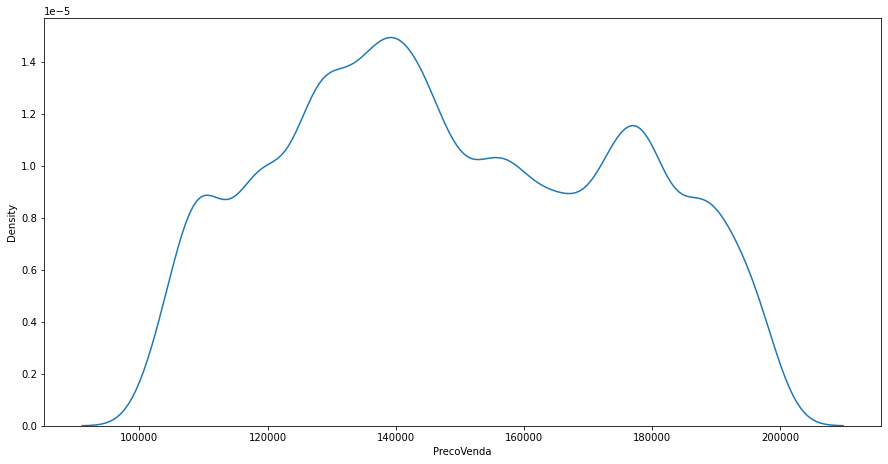

In [809]:
sns.kdeplot(data=dp.query('100000<PrecoVenda<200000'), x='PrecoVenda', bw_adjust=.5);

* O preço está distribuído entorno de 140.000 dólares e 180.000 dólares.
* A distribuição aparenta ser bimodal. 
* Existem dois grupos que influenciam tal distribuição? Uma investigação mais profunda é necessária.

<AxesSubplot:xlabel='PrecoVenda', ylabel='Density'>

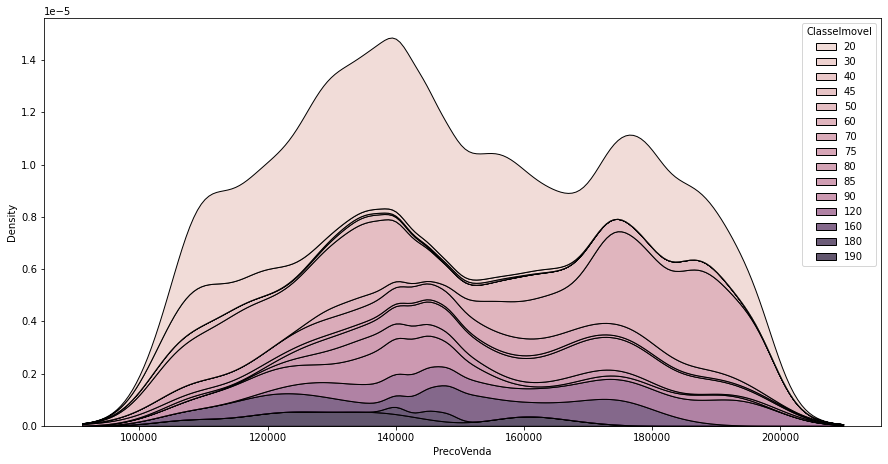

In [810]:
sns.kdeplot(data=dp.query('100000<PrecoVenda<200000'), x='PrecoVenda', hue='ClasseImovel', bw_adjust=0.5, multiple='stack')

* Os imóveis seguem uma distribuição similar.


<AxesSubplot:xlabel='PrecoVenda', ylabel='Density'>

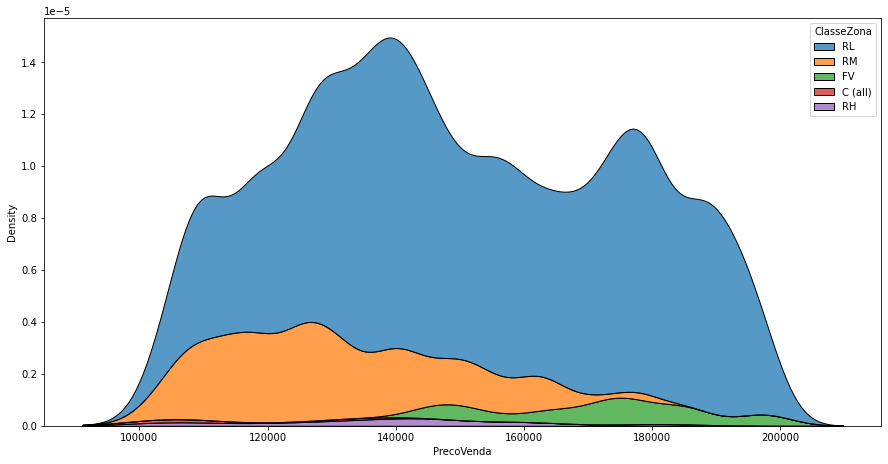

In [811]:
sns.kdeplot(data=dp.query('100000<PrecoVenda<200000'), x='PrecoVenda', hue='ClasseZona', bw_adjust=0.5, multiple='stack')

**ClasseZona A classificação geral de zoneamento**
* C Comercial
* FV Vila de flutuação Residencial
* RH Residencial Alta densidade
* RL Residencial Baixa densidade
* RP Estacionamento Residencial de Baixa Densidade
* RM Residencial Média densidade

**Observações** 
* Residencial de Média densidade tem uma distribuição assimétrica e unimodal.
* Residencial de Baixa densidade tem uma distribuição assimétrica e bimodal.
* FV Vila de flutuação Residencial tem uma distribuição assimétrica e trimodal.
* A classificação geral de zoneamento está associada à mudança na distribuição dos preços.
* A exceção à regra é o zoneamento RL, que ainda está bimodal.

**Questionamentos e hipóteses**
* O zoneamento de baixa densidade pode ser o subúrbio, que são áreas mais afastadas da cidade. 
* O bairro provavelmente é composto de casas.

C:\Users\Akihiro\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='PrecoVenda', ylabel='Density'>

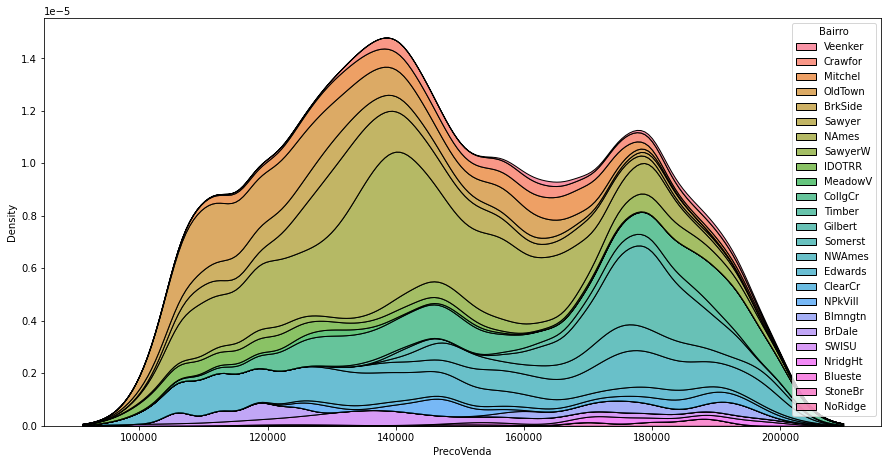

In [812]:
sns.kdeplot(data=dp.query('100000<PrecoVenda<200000'), x='PrecoVenda', hue='Bairro', bw_adjust=0.5, multiple='stack')

**Observações**
* Os bairros mais valorizados estão com a moda entorno de 180000 dólares.
* Os bairros menos valorizados estão com a moda entorno de 140000 dólares.
* Os bairros com valor intermediário estão com uma distribuição bimodal.
* Bairros mais valorizados: IDOTRR, MeadowV, CollgCr e Timber.

**Questionamentos e hipóteses**
* Provavelmente os bairros com valor intermediário estão com duas distribuições porque as casas que se aproximam dos bairros menos e mais valorizados acabam sendo vendidas pelo preço de ancoragem dos bairros adjacentes.
* O que faz um bairro ser mais valorizado do que os outros?

In [813]:
dp[['Bairro']].value_counts()

Bairro 
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
dtype: int64

<h2>Análise de Variável Categórica: Bairro</h2>

In [814]:
escopo = ['NAmes',
        'CollgCr',
        'OldTown',
        'Edwards',
        'Somerst',
        'Gilbert', 
        'NridgHt',
        'Sawyer',      
        'NWAmes',    
        'SawyerW',     
        'BrkSide',     
        'Crawfor',     
        'Mitchel',     
        'NoRidge',     
        'Timber',     
        'IDOTRR']
bairro_escopo = dp[dp['Bairro'].isin(escopo)]

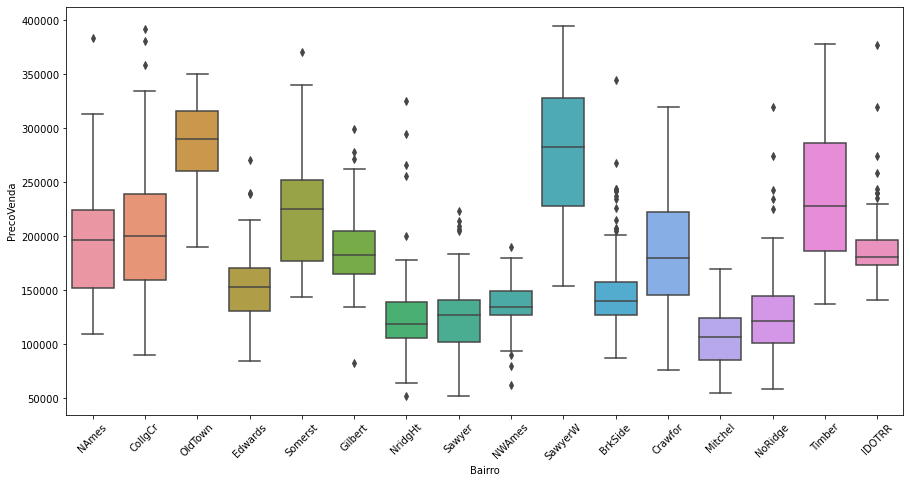

In [815]:
plt.rcParams["figure.figsize"] = [15.00, 7.50]
ax = sns.boxplot(x='Bairro', y='PrecoVenda', data=bairro_escopo.query('50000<PrecoVenda<400000'))
ax.set_xticklabels(labels=escopo, rotation=45)
plt.show()

In [816]:
bairro_mean = dp[['PrecoVenda', 'Bairro']].groupby(['Bairro'], sort=False).agg(['median'])

In [817]:
bairro_mean['PrecoVenda']['median'].sort_values()

Bairro
MeadowV     88000.0
IDOTRR     103000.0
BrDale     106000.0
OldTown    119000.0
Edwards    121750.0
BrkSide    124300.0
Sawyer     135000.0
Blueste    137500.0
SWISU      139500.0
NAmes      140000.0
NPkVill    146000.0
Mitchel    153500.0
SawyerW    179900.0
Gilbert    181000.0
NWAmes     182900.0
Blmngtn    191000.0
CollgCr    197200.0
ClearCr    200250.0
Crawfor    200624.0
Veenker    218000.0
Somerst    225500.0
Timber     228475.0
StoneBr    278000.0
NoRidge    301500.0
NridgHt    315000.0
Name: median, dtype: float64

* O conjunto de medianas mostra uma grande diferença entre bairros, desde **88000** até **315000** dólares o preço mediano de uma casa.
* Seria interessane agrupar esses bairros para generalizarmos de forma mais precisa.

In [818]:
dp['PrecoVenda'].median()

163000.0

* A referência de preço será 163000 dólares para criarmos novas categorias em relação aos bairros

In [819]:
dp_2 = dp.copy()

In [820]:
bairro_mto_pouco_val = ['MeadowV',
                    'IDOTRR',
                    'BrDale',     
                    'OldTown',    
                    'Edwards']
bairro_pouco_val = ['BrkSide',
                    'Sawyer',
                    'Blueste',
                    'SWISU',
                    'NAmes',
                    'NPkVill',
                    'Mitchel']
bairro_medio_val = ['SawyerW',
                    'Gilbert',
                    'NWAmes',    
                    'Blmngtn',    
                    'CollgCr']
bairro_mto_val = ['ClearCr',
                  'Crawfor',
                  'Veenker',   
                  'Somerst',    
                  'Timber']

bairro_super_val = ['StoneBr',
                    'NoRidge',
                    'NridgHt']   
  
dp_2['Bairro_cat'] = np.nan
for j in range(len(dp_2['Bairro'])):
    if dp_2['Bairro'][j] in bairro_mto_pouco_val:
        dp_2['Bairro_cat'][j] = 0
    elif dp_2['Bairro'][j] in bairro_pouco_val:
        dp_2['Bairro_cat'][j] = 1
    elif dp_2['Bairro'][j] in bairro_medio_val:
        dp_2['Bairro_cat'][j] = 2
    elif dp_2['Bairro'][j] in bairro_mto_val:
            dp_2['Bairro_cat'][j] = 3
    elif dp_2['Bairro'][j] in bairro_super_val:
            dp_2['Bairro_cat'][j] = 4

C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/3596945065.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['Bairro_cat'][j] = 2
C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/3596945065.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['Bairro_cat'][j] = 3
C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/3596945065.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['Bairro_cat'][j] = 4
C:\User

<AxesSubplot:xlabel='PrecoVenda', ylabel='Density'>

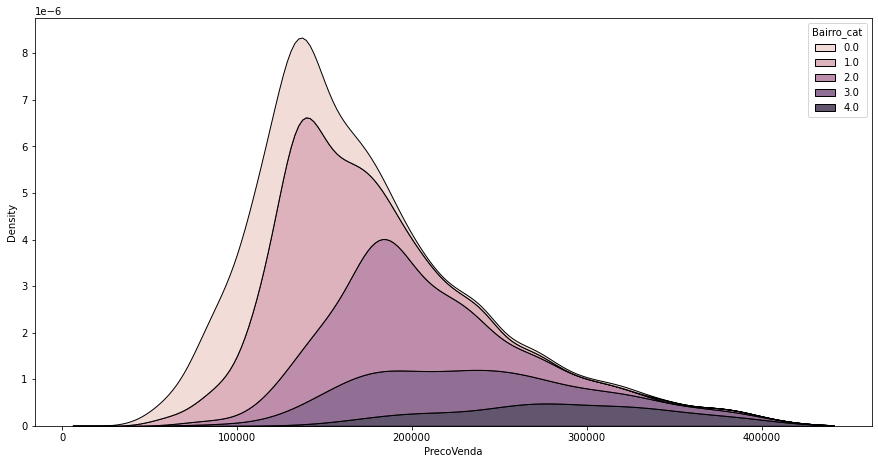

In [821]:
sns.kdeplot(data=dp_2.query('50000<PrecoVenda<400000'), 
            x="PrecoVenda", 
            hue='Bairro_cat', 
            multiple='stack')

<AxesSubplot:xlabel='Bairro_cat', ylabel='PrecoVenda'>

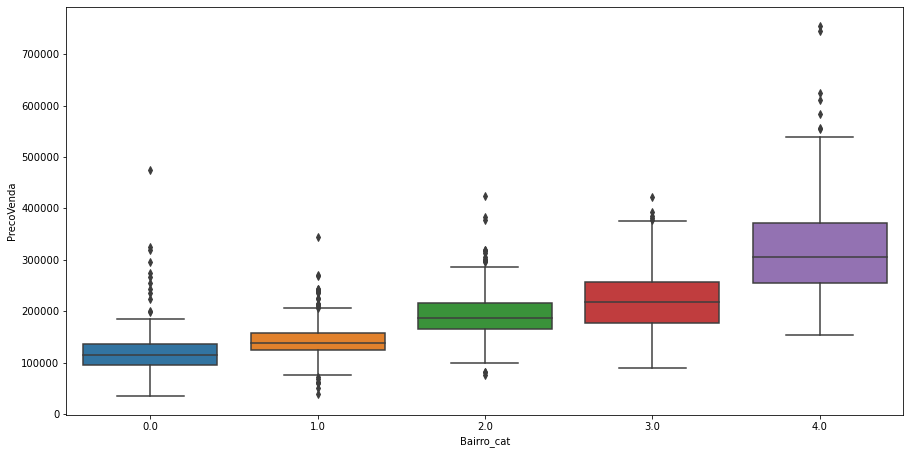

In [822]:
sns.boxplot(data=dp_2, x='Bairro_cat', y='PrecoVenda')

* Conseguimos ver diferença entre os preços de venda das novas categorias de bairros.
* Será que essa diferença tem uma significância estatística?
* Farei um teste-f e ANOVA para descobrir se a categoria é relevante ou não.

<h3>Teste de hipótese<h3>

In [823]:
from scipy.stats import f_oneway
dp_aux = dp_2[['Bairro_cat', 'PrecoVenda']] 
stat, p = f_oneway(dp_aux[(dp_aux.Bairro_cat==0)]['PrecoVenda'],
                  dp_aux[(dp_aux.Bairro_cat==1)]['PrecoVenda'],
                  dp_aux[(dp_aux.Bairro_cat==2)]['PrecoVenda'],
                  dp_aux[(dp_aux.Bairro_cat==3)]['PrecoVenda'],
                  dp_aux[(dp_aux.Bairro_cat==4)]['PrecoVenda'])
print('stat: %.2f, p: %.2f' % (stat, p))

stat: 414.28, p: 0.00


O p-value < 0.05, logo pelo menos um grupo tem média com significância estatística em relação aos demais.

In [824]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(dp_aux['PrecoVenda'],
                         dp_aux['Bairro_cat'],
                         alpha=0.05)

In [825]:
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj    lower       upper    reject
--------------------------------------------------------------
   0.0    1.0   21016.747 0.001   9706.5836  32326.9104   True
   0.0    2.0  71829.0855 0.001  60151.1562  83507.0148   True
   0.0    3.0 102443.8496 0.001   88985.794 115901.9052   True
   0.0    4.0 199289.6972 0.001 184047.4924  214531.902   True
   1.0    2.0  50812.3385 0.001   40404.654   61220.023   True
   1.0    3.0  81427.1026 0.001  69055.1535  93799.0518   True
   1.0    4.0 178272.9502 0.001 163980.6211 192565.2793   True
   2.0    3.0  30614.7641 0.001  17905.7373  43323.7909   True
   2.0    4.0 127460.6117 0.001 112875.5198 142045.7037   True
   3.0    4.0  96845.8476 0.001  80799.9716 112891.7236   True
--------------------------------------------------------------


* De acordo com o nosso teste estatístico ANOVA, todas as categorias criadas apresentam médias de preço de venda diferentes entre si com significância estatística de pelo menos 5%.

<AxesSubplot:>

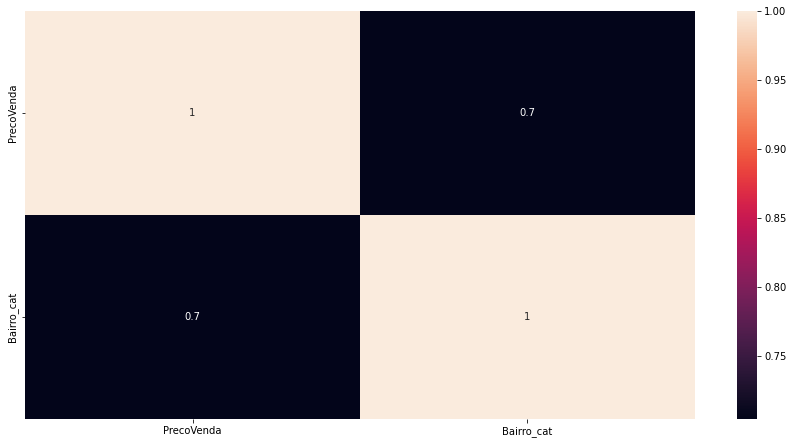

In [826]:
sns.heatmap(dp_2[['PrecoVenda', 'Bairro_cat']].corr(), annot=True)

**Podemos retomar a análise de dados de forma mais geral usando o describe().**

In [827]:
dp_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
ClasseImovel,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
Fachada,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
TamanhoLote,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
Qualidade,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
Condicao,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
AnoConstrucao,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
AnoReforma,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
AreaAlvenaria,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
AreaAcabPorao1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Depois de analisar os interquartis, percebi que existem variáveis com uma diferença significativa em relação à mediana (interquartil de 50%):
* AreaConstruida
* AreaVarandaAberta
* AreaGaragem
* AreaPorao
* TamanhoLote
* AnoReforma
* TotalQuartos
* Qualidade
* Condicao
* Banheiro
* BaixaQualiAreaAcab

<AxesSubplot:>

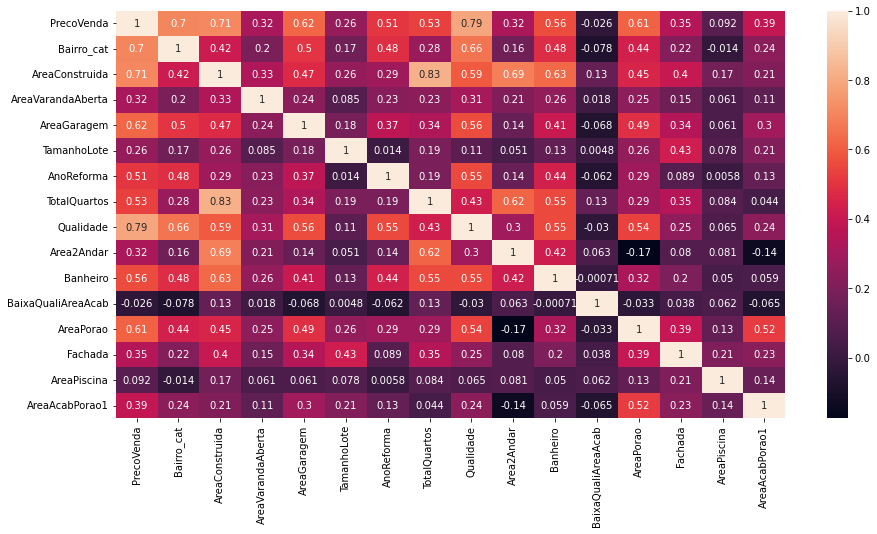

In [828]:
var_geral = ['PrecoVenda',  
             'Bairro_cat', 
             'AreaConstruida', 
             'AreaVarandaAberta', 
             'AreaGaragem', 
             'TamanhoLote', 
             'AnoReforma', 
             'TotalQuartos', 
             'Qualidade', 
             'Area2Andar', 
             'Banheiro', 
             'BaixaQualiAreaAcab',
              'AreaPorao',
              'Fachada',
               'AreaPiscina',
                'AreaAcabPorao1']
sns.heatmap(dp_2[var_geral].corr(), annot=True)

<h2>Análise das variáveis categóricas: </h2>

Analisar variáveis categóricas associadas à lista acima:

<AxesSubplot:xlabel='CondicaoPorao', ylabel='PrecoVenda'>

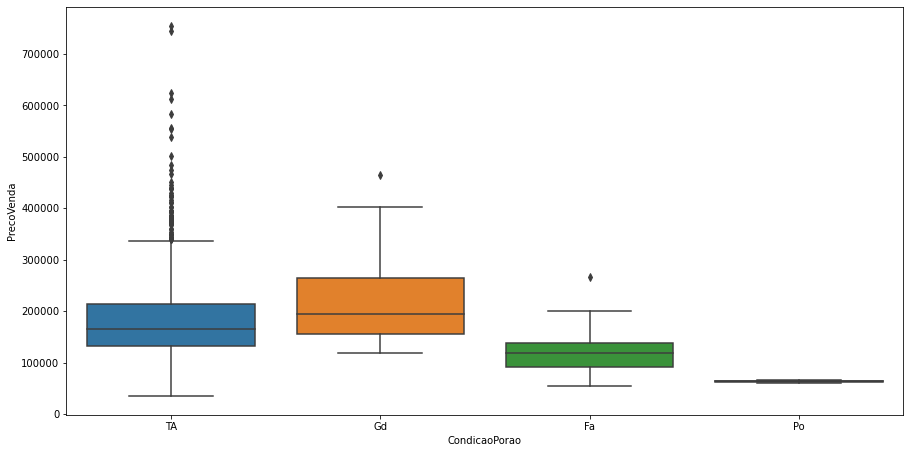

In [829]:
sns.boxplot(data=dp_2, x='CondicaoPorao', y='PrecoVenda')

<AxesSubplot:xlabel='AlturaPorao', ylabel='PrecoVenda'>

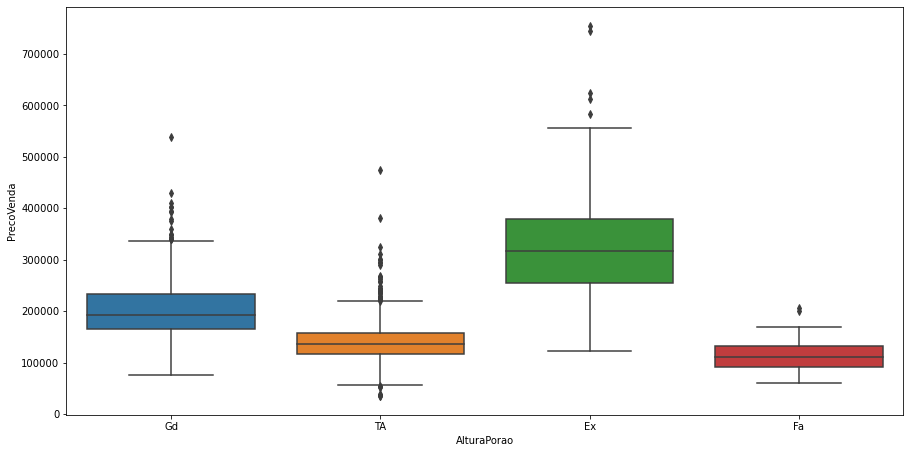

In [830]:
sns.boxplot(data=dp_2, x='AlturaPorao', y='PrecoVenda')

<AxesSubplot:xlabel='QualidadeAquecimento', ylabel='PrecoVenda'>

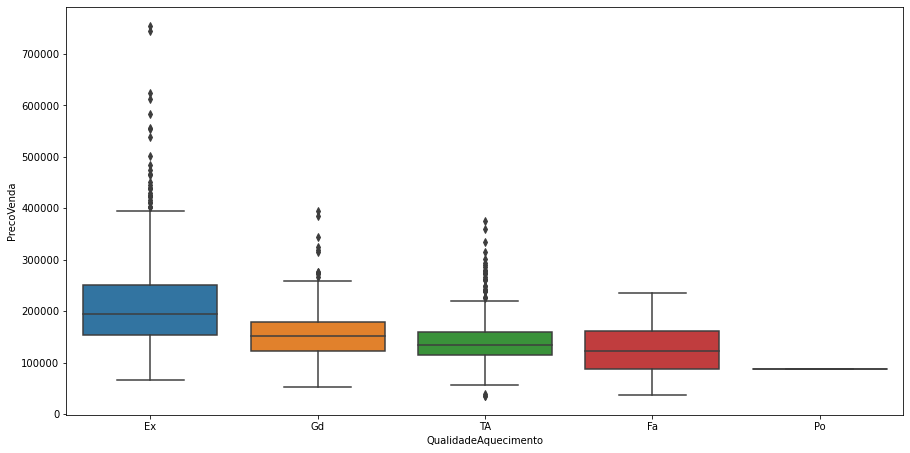

In [831]:
sns.boxplot(data=dp_2, x='QualidadeAquecimento', y='PrecoVenda')

<AxesSubplot:xlabel='TipoHabitacao', ylabel='PrecoVenda'>

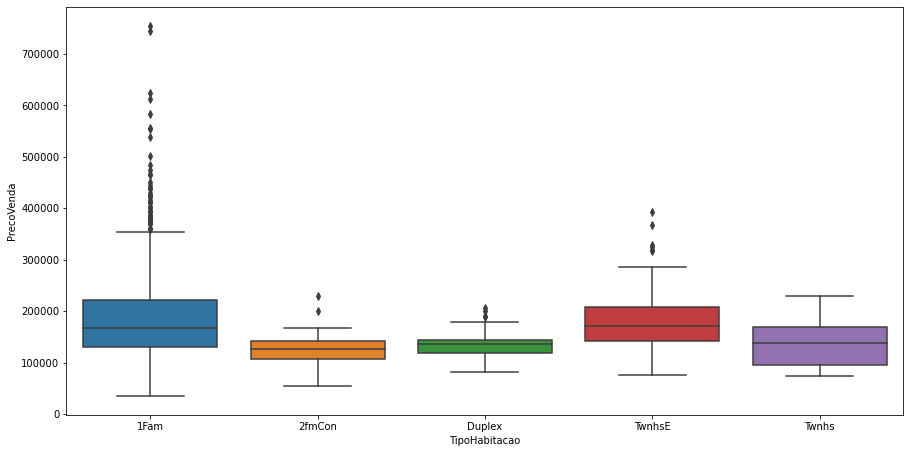

In [832]:
sns.boxplot(data=dp_2, x='TipoHabitacao', y='PrecoVenda')

<AxesSubplot:xlabel='QualidadeCozinha', ylabel='PrecoVenda'>

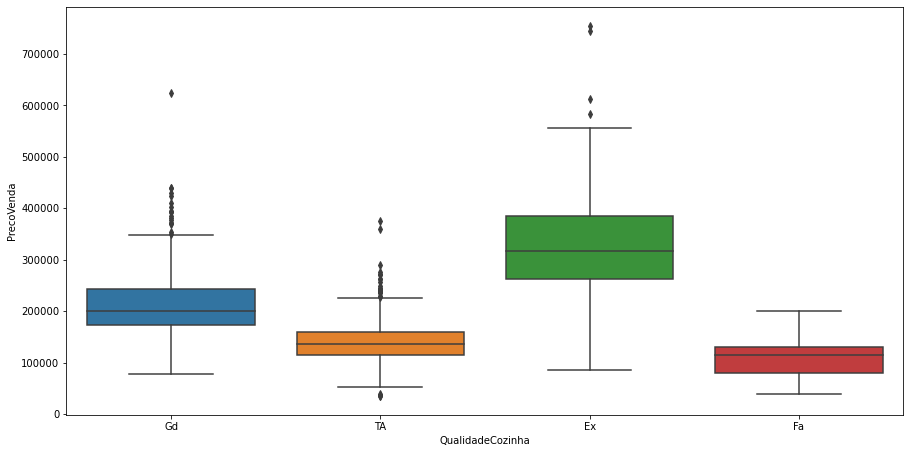

In [833]:
sns.boxplot(data=dp_2, x='QualidadeCozinha', y='PrecoVenda')

<AxesSubplot:xlabel='QualidadeCobertura', ylabel='PrecoVenda'>

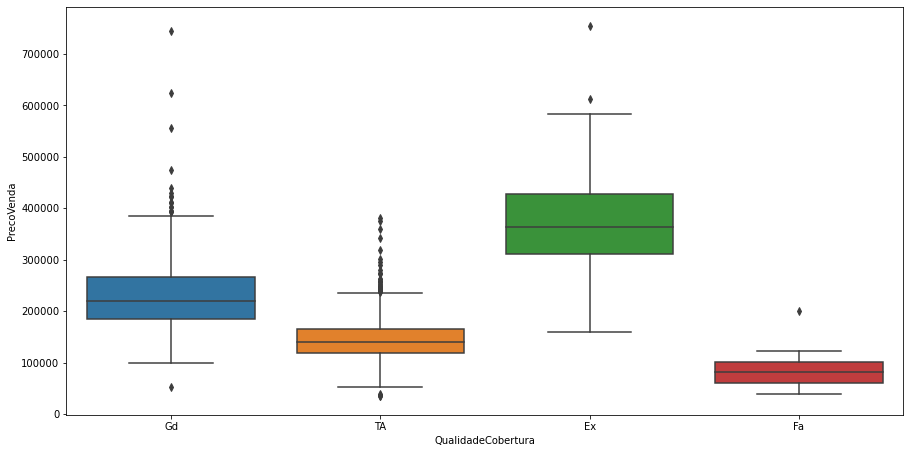

In [834]:
sns.boxplot(data=dp_2, x='QualidadeCobertura', y='PrecoVenda')

<h2>Transformações das variáveis categóricas</h2>

<h3>Transformações das variáveis categóricas</h3>

In [835]:
dp_2['CondicaoPorao_cat'] = np.nan

for i in range(len(dp_2['CondicaoPorao'])):
    if dp_2['CondicaoPorao'][i] == 'Po':
        dp_2['CondicaoPorao_cat'][i] = 0
    elif dp_2['CondicaoPorao'][i] == 'Fa':
        dp_2['CondicaoPorao_cat'][i] = 1
    elif dp_2['CondicaoPorao'][i] == 'TA':
        dp_2['CondicaoPorao_cat'][i] = 2
    elif dp_2['CondicaoPorao'][i] == 'Gd':
        dp_2['CondicaoPorao_cat'][i] = 3
        
dp_2['AlturaPorao_cat'] = np.nan
for i in range(len(dp_2['AlturaPorao'])):
    if dp_2['AlturaPorao'][i] == 'Fa':
        dp_2['AlturaPorao_cat'][i] = 0
    elif dp_2['AlturaPorao'][i] == 'TA':
        dp_2['AlturaPorao_cat'][i] = 1
    elif dp_2['AlturaPorao'][i] == 'Gd':
        dp_2['AlturaPorao_cat'][i] = 2
    elif dp_2['AlturaPorao'][i] == 'Ex':
        dp_2['AlturaPorao_cat'][i] = 3    

aquec_ruim = ['Fa', 'Ta', 'Po', 'TA']
dp_2['QualAquec_cat'] = np.nan
for i in range(len(dp_2['QualidadeAquecimento'])):
    if dp_2['QualidadeAquecimento'][i] in aquec_ruim:
        dp_2['QualAquec_cat'][i] = 0
    elif dp_2['QualidadeAquecimento'][i] == 'Gd':
        dp_2['QualAquec_cat'][i] = 1
    elif dp_2['QualidadeAquecimento'][i] == 'Ex':
        dp_2['QualAquec_cat'][i] = 2

dp_2['Tipo_hab_cat'] = np.nan
Tipo_hab_1 = ['2fmCon', 'Duplex', 'Twnhs']
Tipo_hab_2 = ['1Fam', 'TwnhsE']
for i in range(len(dp_2['TipoHabitacao'])):
    if dp_2['TipoHabitacao'][i] in Tipo_hab_1:
        dp_2['Tipo_hab_cat'][i]=0
    elif dp_2['TipoHabitacao'][i] in Tipo_hab_2:
        dp_2['Tipo_hab_cat'][i]=1
        
dp_2['Qual_Coz_cat'] = np.nan
for i in range(len(dp_2['QualidadeCozinha'])):
    if dp_2['QualidadeCozinha'][i]=='Fa':
        dp_2['Qual_Coz_cat'][i]=0
    elif dp_2['QualidadeCozinha'][i]=='TA':
        dp_2['Qual_Coz_cat'][i]=1
    elif dp_2['QualidadeCozinha'][i]=='Gd':
        dp_2['Qual_Coz_cat'][i]=2
    elif dp_2['QualidadeCozinha'][i]=='Ex':
        dp_2['Qual_Coz_cat'][i]=3

dp_2['QualCob_cat'] = np.nan
qual_cobertura = ['Ex', 'Gd', 'Ta', 'Fa', 'Po']
qual_cob_ruim = ['Po', 'Fa']
ta = ['Ta', 'TA']
for i in range(len(dp_2['QualidadeCobertura'])):
    if dp_2['QualidadeCobertura'][i] in qual_cob_ruim:
        dp_2['QualCob_cat'][i] = 0
    elif dp_2['QualidadeCobertura'][i] in ta:
        dp_2['QualCob_cat'][i] = 1
    elif dp_2['QualidadeCobertura'][i] == 'Gd':
        dp_2['QualCob_cat'][i] = 2
    elif dp_2['QualidadeCobertura'][i] == 'Ex':
        dp_2['QualCob_cat'][i] = 3


C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/1858774546.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['CondicaoPorao_cat'][i] = 2
C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/1858774546.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['CondicaoPorao_cat'][i] = 3
C:\Users\Akihiro\AppData\Local\Temp/ipykernel_1765720/1858774546.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_2['CondicaoPorao_c

<h3>Construção de Features para melhorar a interpretabilidade do modelo</h3>

In [836]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import statsmodels.formula.api as sms

# Sala e cozinha podem ser encontradas a partir da subtração de outras áreas em relação ao térreo.
dp_2['Sala_e_cozinha'] =  (dp_2['AreaTerreo']-
                           dp_2['AreaGaragem']-
                           dp_2['AreaAlpendre']-
                           dp_2['AreaDeck']-
                           dp_2['AreaAlpendre'])

# Fórmula da cozinha, dividir pelo números de lareiras 
# pode ser um jeito de descobrir a proporção da sala em relação à cozinha.
dp_2['Cozinha'] = dp_2['Sala_e_cozinha']/(dp_2['Lareira']+1)

# Fórmula da sala.
dp_2['Sala'] = dp_2['Sala_e_cozinha']-dp_2['Cozinha']

# Áreas relevantes por quarto tomam como referência o número de pessoas que irão habitar a casa.
dp_2['AreasRelev_por_quarto'] = (dp_2['Sala']+
                                 dp_2['Cozinha']+
                                 dp_2['AreaPorao']+
                                 dp_2['AreaAlpendre']+
                                 dp_2['AreaDeck']+
                                 dp_2['Fachada']+
                                 dp_2['AreaVaranda3Estacoes']+
                                 dp_2['AreaGaragem'])/dp_2['TotalQuartos']

# A cozinha em relação ao tamanho do lote não pode ser muito grande 
# a ponto de deixar as outras áreas do térreo muito pequenas.
dp_2['Cozinha_por_Lote'] =  dp_2['Cozinha']/dp_2['TamanhoLote']

# Banheiros de todos os andares e lavabo no térreo.
dp_2['Banheiros_tot'] = ((dp_2['Banheiro'] + dp_2['Lavabo'])+dp_2['BanheiroPorao'])

# Banheiro compartilhado pode ser um motivo de valorização 
# já que o número de quartos pode aumentar sem aumentar o custo de infraestrutura do banheiro.
dp_2['Banheiro_compartilhado'] = dp_2['TotalQuartos']-dp_2['Banheiros_tot']

# Qualidade relevante do imóvel.
dp_2['Qual_Relev_sqrt'] = ((dp_2['Qualidade']*dp_2['Condicao']*dp_2['Qual_Coz_cat']))**.5
dp_2['Qual_Relev'] = (dp_2['Qualidade']*dp_2['Condicao']*dp_2['Qual_Coz_cat'])

# Transformação em log da variável PrecoVenda.
dp_2['PrecoVenda_log'] = np.log(dp_2['PrecoVenda'])

# Banheiros_tot + Bairro_cat + Qual_Relev_sqrt + Cozinha_por_Lote + Sala_e_cozinha + AreaPorao_sqrt

<h3>Modelo de Regressão Linear Múltipla</h3>

In [837]:
mod_wls = sms.wls(formula='PrecoVenda_log ~ Banheiros_tot + Bairro_cat + Qual_Relev_sqrt + Cozinha_por_Lote + AreasRelev_por_quarto + Banheiro_compartilhado', data=dp_2).fit()
print(mod_wls.summary())

                            WLS Regression Results                            
Dep. Variable:         PrecoVenda_log   R-squared:                       0.850
Model:                            WLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1132.
Date:                Thu, 24 Feb 2022   Prob (F-statistic):               0.00
Time:                        13:14:11   Log-Likelihood:                 490.62
No. Observations:                1201   AIC:                            -967.2
Df Residuals:                    1194   BIC:                            -931.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 10

<h1>Diagnóstico do Modelo</h1>

O modelo estatístico precisa cumprir 5 princípios ao analisar os resíduos :
* Independência
* Normalidade
* Multicolinearidade
* Homocedasticidade
* Linearidade

In [838]:
modelo_residuo = mod_wls.resid
modelo_y_ajustado = mod_wls.fittedvalues

<h3>Independência</h3>

Teste de Durbin-Watson: **1.962** 
* Se o valor estiver próximo de 0 ou 4, os resíduos dependem temporalmente um do outro.
* Se o valor estiver próximo de 2, os dados são independentes entre si, provavelmente não é uma série temporal.

<h3>Normalidade</h3>

<AxesSubplot:ylabel='Density'>

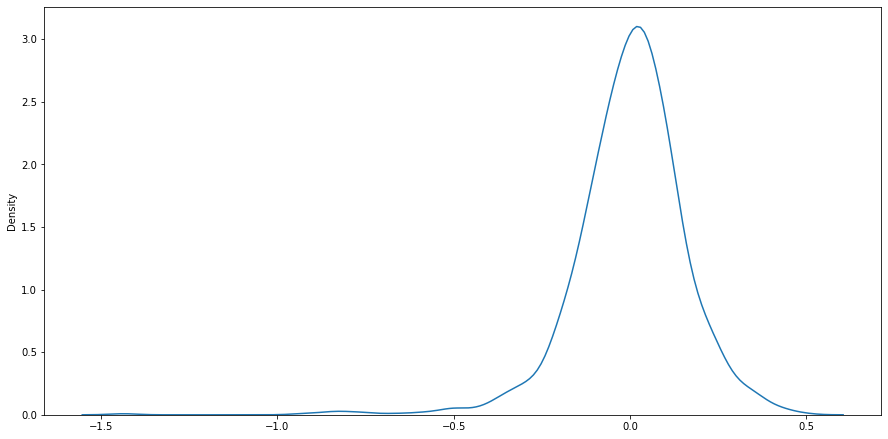

In [839]:
sns.kdeplot(data=modelo_residuo)

* Os resíduos constituíram praticamente uma distribuição normal com média 0.
* Segue o princípio da normalidade.

<h3>Multicolinearidade</h3>

In [840]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set

X = dp_2[['Banheiros_tot', 'Bairro_cat', 'Qual_Relev', 'Cozinha_por_Lote', 'AreasRelev_por_quarto', 'Banheiro_compartilhado']].dropna(axis=0)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

                  feature       VIF
0           Banheiros_tot  8.003067
1              Bairro_cat  4.577035
2              Qual_Relev  5.883574
3        Cozinha_por_Lote  2.515082
4   AreasRelev_por_quarto  7.631333
5  Banheiro_compartilhado  5.326103


* Multicolinearidade forte: VIF<10.
* Multicolinearidade moderada: 5<VIF<10
* Multicolinearidade fraca: 0<VIF<5

* O **VIF das variáveis deu até multicolinearidade moderada.**

<h3>Linearidade e Homocedasticidade</h3>

C:\Users\Akihiro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


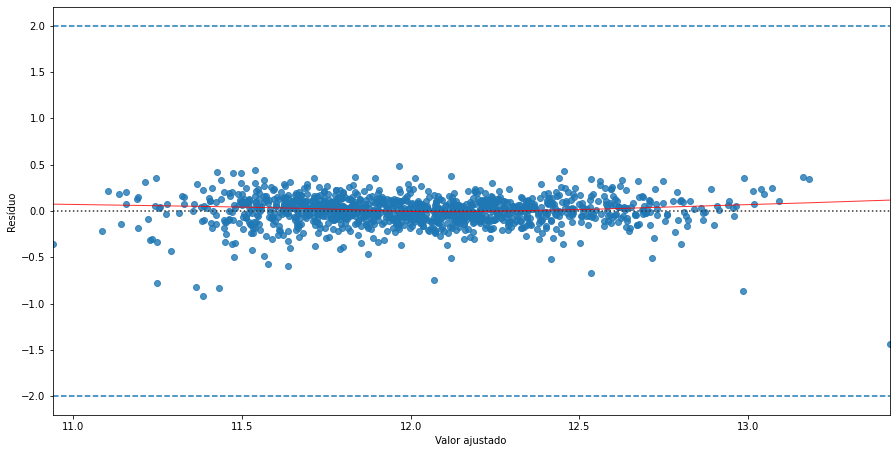

[('Goldfeld-Quandt - F statistic', 1.00526444926572), ('p-value', 0.47450351292966464)]


In [841]:
# GRÁFICO PARA LINEARIDADE E HOMOCEDASTICIDADE #

sns.residplot(modelo_y_ajustado, modelo_residuo, 
                          lowess=True,
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.axhline(y = 2, linestyle='dashed')
plt.axhline(y = -2, linestyle='dashed')
plt.ylabel('Resíduo')
plt.xlabel('Valor ajustado')
plt.show()

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#Heteroskedasticity tests

#Goldfeld-Quandt test

name = ["Goldfeld-Quandt - F statistic", "p-value"]
test = sms.het_goldfeldquandt(modelo_residuo, mod_wls.model.exog)
print(lzip(name, test))

* Os resíduos estão praticamente sem tendência de acordo com a linha vermelha praticamente na horizontal.
* A variação é constante de acordo com  o teste de Goldfeld-Quandt. 

<h1>Transformação das variáveis para interpretar os betas do modelo estatístico</h1>

* Alvo: PrecoVenda_log
* Intercepto: **10.4803**
* Beta 1 do Banheiros_tot: **0.1730**  
* Beta 2 do Bairro_cat: **0.0917**    
* Beta 3 do Qual_Relev_sqrt: **0.0494**      
* Beta 4 do Cozinha_por_Lote: **-1.1512**     
* Beta 5 do Areas_Relev: **0.0010**
* Beta 6 do Banheiro_compartilhado: **0.0829**

In [842]:
# Armazenar os valores dos betas.
intercepto = 10.4803
beta_1 = 0.1730
beta_2 = 0.0917
beta_3 = 0.0494**2
beta_4 = -1.1512
beta_5 = 0.0010
beta_6 = 0.0829

In [843]:
# Usar função exponencial para transformar as variáveis em %.
beta_1 = (math.exp(beta_1)-1)*100
beta_2 = (math.exp(beta_2)-1)*100
beta_3 = (math.exp(beta_3)-1)*100
beta_4 = (math.exp(beta_4)-1)*100
beta_5 = (math.exp(beta_5)-1)*100
beta_6 = (math.exp(beta_6)-1)*100

In [844]:
# O intercepto é intrepretável quando transformado sem %.
print('Intercepto:', math.e**intercepto)
# Os betas em %.
print('Beta_1: %.2f' % beta_1, '%')
print('Beta_2: %.2f' % beta_2, '%')
print('Beta_3: %.2f' % beta_3, '%')
print('Beta_4: %.2f' % beta_4, '%')
print('Beta_5: %.2f' % beta_5, '%')
print('Beta_6: %.2f' % beta_6, '%')

Intercepto: 35607.08806602551
Beta_1: 18.89 %
Beta_2: 9.60 %
Beta_3: 0.24 %
Beta_4: -68.37 %
Beta_5: 0.10 %
Beta_6: 8.64 %


<h1>Sumário</h1>

**Resumo Geral**

* $ R^2 ajustado = 0.85 $
    * 85% das variações do preço de venda são explicadas pelo modelo de regressão múltipla.
* $ Prob(F-Statistics) = 0.00 $
    * O modelo criado explica melhor as variações do preço de venda que o modelo sem as variáveis.
* $ P>|t| = 0.00 $
    * As variáveis do modelo são significantemente estatísticas.

**Resumo da interpretação dos coeficientes**

**Intercepto**
* Quando o imóvel, que está em um bairro muito pouco valorizado, tem uma qualidade de cozinha ruim e uma cobertura ruim, e não apresenta áreas relevantes por quarto, o preço de venda é **35 607 dólares**.

**Beta_1**
* Quando o imóvel acrescenta **um banheiro**, acrescenta em média **18.89%** no preço, mantendo as outras variáveis constantes. 

**Beta_2**
* **Quando o imóvel está em um bairro pouco valorizado**, acrescenta em média **9.6% no preço em relação a um bairro muito pouco valorizado**, mantendo as outras variáveis constantes.

**Beta_3**
* Quando o imóvel acrescenta em **1 ponto a qualidade relevante**, acrescenta em média **24% no preço em relação à qualidade relevante ruim**, mantendo as outras variáveis constantes. 

**Beta_4**
* Quando o imóvel adiciona **1 m2 de cozinha por m2 de lote**, diminui em média **68.37%** no preço, mantendo as outras variáveis constantes.

**Beta_5**
* Quando o imóvel adiciona **1 m2 de area relevante por quarto**, aumenta **0.10%** no preço, mantendo as outras variáveis constantes.

**Beta_6**
* Quando o imóvel adiciona **1 quarto em relação ao número de banheiros totais**, aumenta **8.64%** no preço, mantendo as outras variáveis constantes.

# Conclusão

* A partir dos resultados obtidos, proponho 4 indicadores para serem monitorados pelo mercado imobiliário:
    * Áreas relevantes por quarto.
    * Banheiro compartilhado.
    * Área da Cozinha por m2 de lote. 
    * Qualidade Relevante.